<a href="https://colab.research.google.com/github/RifatHossain6/Sales-forecasting/blob/main/SKU_wise_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset description:

The dataset has 110 entries with 13 columns.The description of each columns is given below:

'Product_Shelf_Visibility',

'Product_Price',

'Supermarket_Opening_Year',

 'Product_Supermarket_Sales',

 'Supermarket_Identifier',

 'Product_Supermarket_Identifier',

 'Product_Fat_Content',

 'Product_Type',

 'Supermarket _Size',

 'Supermarket_Location_Type',

 'Supermarket_Type'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_dataset.csv')

In [ ]:
len(dataset)

110

In [ ]:
print(type(dataset))
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,12.600,0.074339,638.84,2014,24161.88,0,41,1,4,0,0,0
1,5.695,0.065961,648.16,2014,23189.81,0,42,0,5,0,0,0
2,16.750,0.081485,645.25,2009,22487.40,2,87,0,6,0,0,0
3,9.895,0.048761,651.32,2009,22127.86,2,71,1,5,0,0,0
4,8.050,0.078844,642.66,2014,21901.49,0,23,1,6,0,0,0


In [ ]:
class_names = list(dataset.columns)[1:]
class_names

['Product_Shelf_Visibility',
 'Product_Price',
 'Supermarket_Opening_Year',
 'Product_Supermarket_Sales',
 'Supermarket_Identifier',
 'Product_Supermarket_Identifier',
 'Product_Fat_Content',
 'Product_Type',
 'Supermarket _Size',
 'Supermarket_Location_Type',
 'Supermarket_Type']

In [ ]:
df.shape

(110, 13)

In [ ]:
# show training data
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,FDK03,CHUKWUDI017,FDK03_CHUKWUDI017,12.600,Normal Fat,0.074339,Dairy,638.84,2014,NaN,Cluster 2,Supermarket Type1,24161.88
1,FDK28,CHUKWUDI017,FDK28_CHUKWUDI017,5.695,Low Fat,0.065961,Frozen Foods,648.16,2014,NaN,Cluster 2,Supermarket Type1,23189.81
2,FDY55,CHUKWUDI045,FDY55_CHUKWUDI045,16.750,Low Fat,0.081485,Fruits and Vegetables,645.25,2009,NaN,Cluster 2,Supermarket Type1,22487.40
3,FDT16,CHUKWUDI045,FDT16_CHUKWUDI045,9.895,Normal Fat,0.048761,Frozen Foods,651.32,2009,NaN,Cluster 2,Supermarket Type1,22127.86
4,FDD44,CHUKWUDI017,FDD44_CHUKWUDI017,8.050,Normal Fat,0.078844,Fruits and Vegetables,642.66,2014,NaN,Cluster 2,Supermarket Type1,21901.49


In [ ]:
df =df.apply(lambda x:x.fillna(x.value_counts().index[0]))
#replace null values with the mode of each column

In [ ]:
cats = df.select_dtypes(include=['object']).copy()


In [ ]:
cats.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,FDK03,CHUKWUDI017,FDK03_CHUKWUDI017,Normal Fat,Dairy,Small,Cluster 2,Supermarket Type1
1,FDK28,CHUKWUDI017,FDK28_CHUKWUDI017,Low Fat,Frozen Foods,Small,Cluster 2,Supermarket Type1
2,FDY55,CHUKWUDI045,FDY55_CHUKWUDI045,Low Fat,Fruits and Vegetables,Small,Cluster 2,Supermarket Type1
3,FDT16,CHUKWUDI045,FDT16_CHUKWUDI045,Normal Fat,Frozen Foods,Small,Cluster 2,Supermarket Type1
4,FDD44,CHUKWUDI017,FDD44_CHUKWUDI017,Normal Fat,Fruits and Vegetables,Small,Cluster 2,Supermarket Type1


In [ ]:
t = cats.columns
for col in t:
    cats[col] = cats[col].astype('category')

In [ ]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Product_Identifier              110 non-null    category
 1   Supermarket_Identifier          110 non-null    category
 2   Product_Supermarket_Identifier  110 non-null    category
 3   Product_Fat_Content             110 non-null    category
 4   Product_Type                    110 non-null    category
 5   Supermarket _Size               110 non-null    category
 6   Supermarket_Location_Type       110 non-null    category
 7   Supermarket_Type                110 non-null    category
dtypes: category(8)
memory usage: 12.0 KB


In [ ]:
df2 = df.copy()

In [ ]:
df2.drop(t,axis=1,inplace = True)

In [ ]:
cats.drop('Product_Identifier',axis=1,inplace=True)

In [ ]:
t = cats.columns

In [ ]:
#use label encoding to convert categorical data to numerical representation
for col in t:
    cats[col] = cats[col].cat.codes

In [ ]:
cats.head()

,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,0,41,1,4,0,0,0
1,0,42,0,5,0,0,0
2,2,87,0,6,0,0,0
3,2,71,1,5,0,0,0
4,0,23,1,6,0,0,0


In [ ]:
dataset = pd.concat([df2,cats], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
data = pd.DataFrame(scaled_data, columns=dataset.columns.values)

In [ ]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,0.471170,0.399599,0.923771,1.0,1.000000,0.0,0.376147,0.5,0.285714,0.0,0.0,0.0
1,0.000000,0.354566,0.955166,1.0,0.907065,0.0,0.385321,0.0,0.357143,0.0,0.0,0.0
2,0.754350,0.438015,0.945363,0.0,0.839912,1.0,0.798165,0.0,0.428571,0.0,0.0,0.0
3,0.286592,0.262110,0.965810,0.0,0.805538,1.0,0.651376,0.5,0.357143,0.0,0.0,0.0
4,0.160696,0.423818,0.936639,1.0,0.783896,0.0,0.211009,0.5,0.428571,0.0,0.0,0.0


In [ ]:
x = data.drop('Product_Supermarket_Sales',axis=1)
y = data['Product_Supermarket_Sales']

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

In [ ]:
x_train, x_test, y_train , y_test = tts(x,y,test_size=0.30, random_state = 42)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

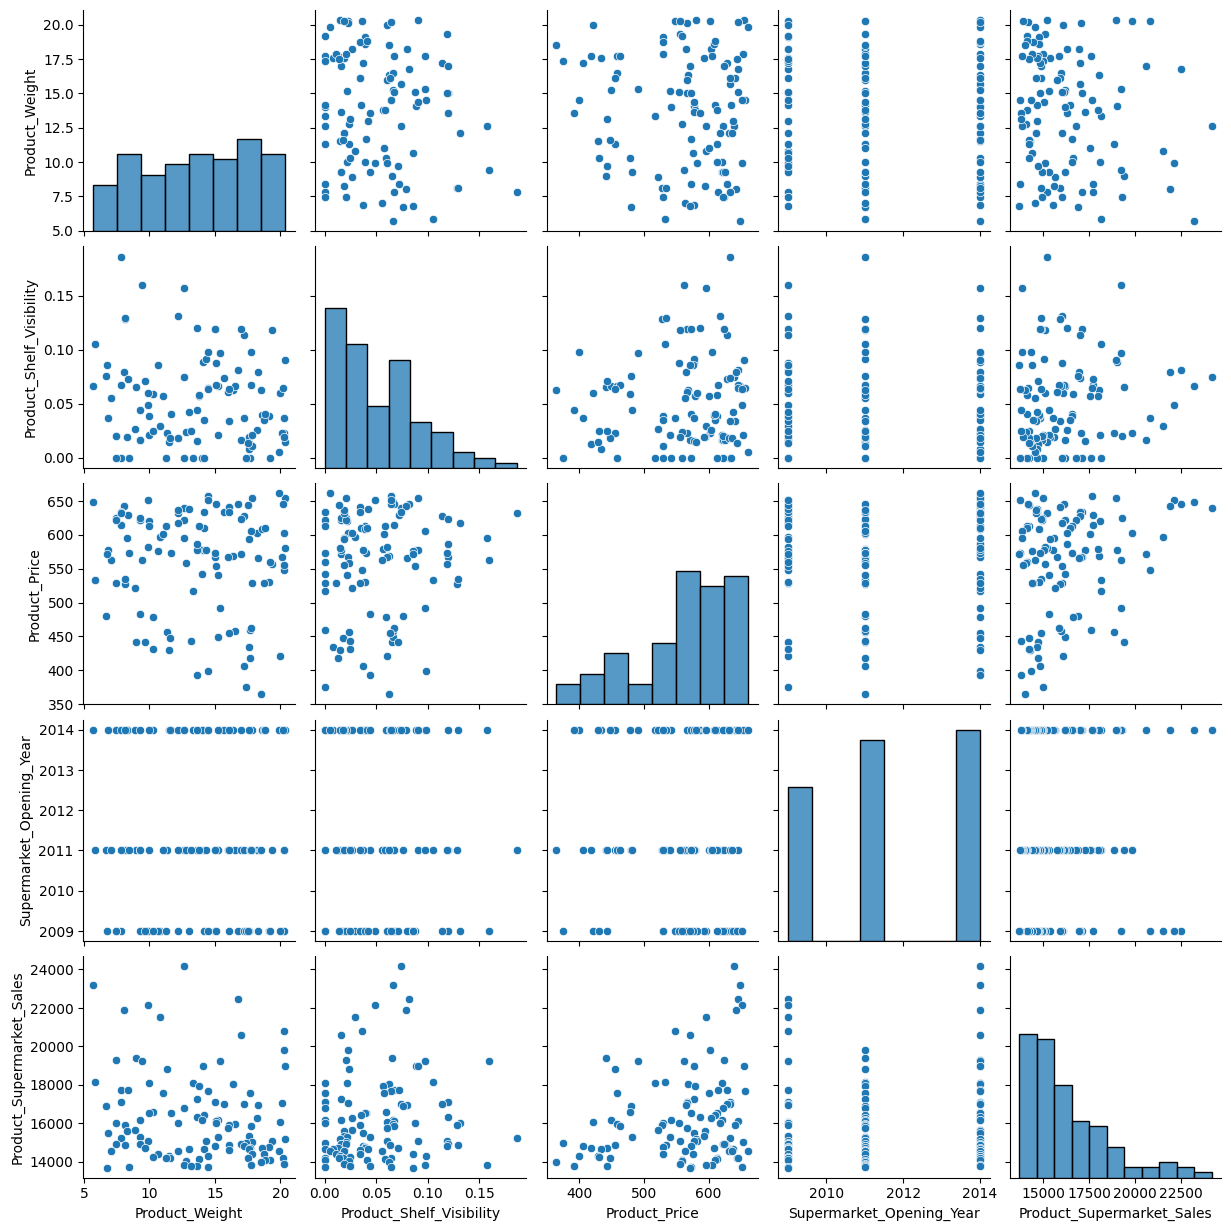

In [ ]:
sns.pairplot(df)
plt.show()